In [2]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")
# sns.set(style="whitegrid", palette=sns.color_palette("RdBu", n_colors=2))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob

In [3]:
sweep_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/src/extras/bnn/bin/bnn-40-2-best_3sweep.csv'
df = pd.read_csv(sweep_fullfile)

def range_transform(x, a, b, c, d):
    return (x - a) * (d - c) / (b - a) + c


# df['Angle'] = df['Angle'].apply(lambda x: range_transform(x, 0, 1, -np.pi, np.pi))

# df['Left Speed'] = df['Left Speed'].apply(lambda x: range_transform(x, 0, 1, 20, -20))
# df['Right Speed'] = df['Right Speed'].apply(lambda x: range_transform(x, 0, 1, 20, -20))

df.describe()

,Angle,Angular Error,Linear Error,Left Speed,Right Speed,Extension
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000
mean,0.500000,0.500000,0.500000,0.556152,0.987301,0.950471
std,0.316347,0.316347,0.316347,0.297307,0.008206,0.075568
min,0.000000,0.000000,0.000000,0.021620,0.959414,0.441001
25%,0.200000,0.200000,0.200000,0.289057,0.982348,0.941654
50%,0.500000,0.500000,0.500000,0.587066,0.989666,0.981153
75%,0.800000,0.800000,0.800000,0.832531,0.993969,0.994081
max,1.000000,1.000000,1.000000,0.989186,0.997429,0.999709


/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


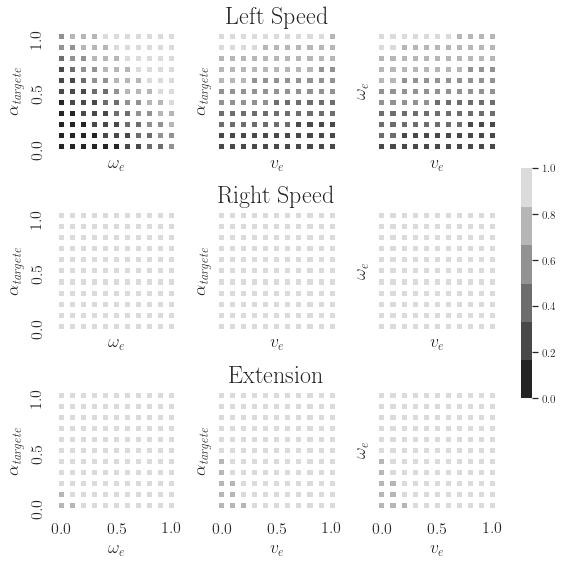

In [4]:
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/
# Request/Heat%20Maps%20using%20Matplotlib%20and%20Seaborn.ipynb



# sns.palplot(sns.cubehelix_palette(8, start=1, rot=-0.75, dark=0.6))
# color_map = sns.cubehelix_palette(8, start=1, rot=-0.75, dark=0.6)
color_map = sns.color_palette('gray')

value_labels = ['Left Speed', 'Right Speed', 'Extension']
axes_labels = [
    ['Angle', 'Angular Error'],
    ['Angle', 'Linear Error'],
    ['Angular Error', 'Linear Error']
]
fancy_labels = {
    'Angle': r'$\alpha_{\mathit{target}}_e$',
    'Angular Error': r'$\omega_e$',
    'Linear Error': r'$v_e$',
}

fsize = 16/2, 16/2
fig, all_axes = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row', figsize=fsize)


ax_num = 0
cbar_ax = fig.add_axes([0.91, 0.3, 0.02, 0.4])
for vl, axes in zip(value_labels, all_axes):
#     fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3 * 3,4.5))
    
    for i, ax, al in zip(range(len(axes)), axes, axes_labels):

        # Grab the needed columns
        heat_data = df[al + [vl]]

        # Group by x and y axes to setup pivot table
        heat_data = heat_data.groupby(al)

        # Take the mean of like indices (average out 3rd input)
        heat_data = heat_data.mean().reset_index()

        # Convert to a pivot table for a Seaborn heatmap
        heat_data = heat_data.pivot(al[0], al[1], vl)

        sns.heatmap(heat_data, vmin=0, vmax=1,
                    ax=ax,
                    xticklabels=5, yticklabels=5,
                    square=True, cmap=color_map, linewidths=5,
                    cbar=ax_num==0, cbar_ax=cbar_ax if i==0 else None);

        ax.invert_yaxis()
        
        ax.yaxis.label.set_size(18)
        ax.yaxis.label.set_text(fancy_labels[al[0]])

        ax.xaxis.label.set_size(18)
        ax.xaxis.label.set_text(fancy_labels[al[1]])
        
        ax.tick_params(labelsize=16)
        
        if (ax_num - 1) % 3 == 0:
            ax.set_title(vl, fontsize=24)
        ax_num += 1

    fig.tight_layout(rect=[0, 0, 0.9, 1])

/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


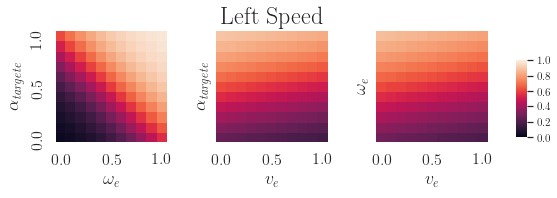

In [6]:
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/
# Request/Heat%20Maps%20using%20Matplotlib%20and%20Seaborn.ipynb

# color_map = sns.color_palette('gray')
# color_map = sns.cubehelix_palette(8, start=1, rot=-0.75, dark=0.6)

value_labels = ['Left Speed']
axes_labels = [
    ['Angle', 'Angular Error'],
    ['Angle', 'Linear Error'],
    ['Angular Error', 'Linear Error']
]
fancy_labels = {
    'Angle': r'$\alpha_{\mathit{target}}_e$',
    'Angular Error': r'$\omega_e$',
    'Linear Error': r'$v_e$',
}

fsize = 16/2, 16/2/3
fig, all_axes = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row', figsize=fsize)


ax_num = 0
cbar_ax = fig.add_axes([0.91, 0.3, 0.02, 0.4])
for vl, axes in zip(value_labels, all_axes):
#     fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3 * 3,4.5))
    
    for i, ax, al in zip(range(len(all_axes)), all_axes, axes_labels):

        # Grab the needed columns
        heat_data = df[al + [vl]]

        # Group by x and y axes to setup pivot table
        heat_data = heat_data.groupby(al)

        # Take the mean of like indices (average out 3rd input)
        heat_data = heat_data.mean().reset_index()

        # Convert to a pivot table for a Seaborn heatmap
        heat_data = heat_data.pivot(al[0], al[1], vl)

        sns.heatmap(heat_data, vmin=0, vmax=1,
                    ax=ax,
                    xticklabels=5, yticklabels=5,
                    square=True, 
#                     cmap=color_map, 
                    linewidths=0,
                    cbar=ax_num==0, cbar_ax=cbar_ax if i==0 else None);

        ax.invert_yaxis()
        
        ax.yaxis.label.set_size(18)
        ax.yaxis.label.set_text(fancy_labels[al[0]])

        ax.xaxis.label.set_size(18)
        ax.xaxis.label.set_text(fancy_labels[al[1]])
        
        ax.tick_params(labelsize=16)
        
        if (ax_num - 1) % 3 == 0:
            ax.set_title(vl, fontsize=24)
        ax_num += 1

    fig.tight_layout(rect=[0, 0, 0.9, 1])

In [5]:
fig.savefig('../paper/figures/4-results/ann_map.pdf')#, bbox_extra_artists=(lgd,), bbox_inches='tight')

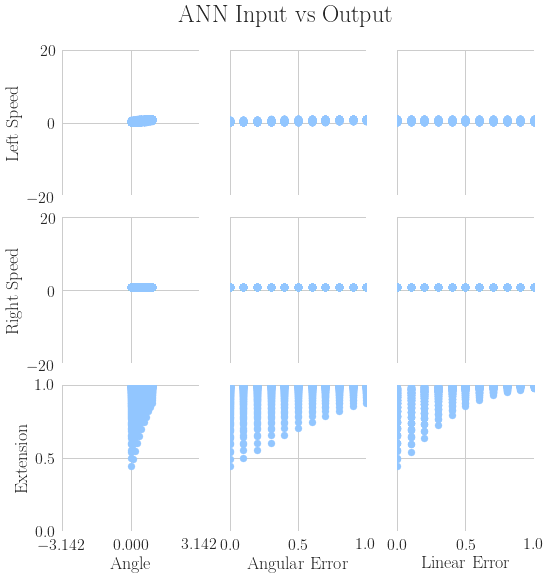

In [6]:
g = sns.PairGrid(df, x_vars=df.columns[:3], y_vars=df.columns[3:])
g = g.map(plt.scatter)

speed_ticks = [-20, 0, 20]
angle_ticks = [-np.pi, 0, np.pi]
scale_ticks = [0, 0.5, 1]

ax_ticks = [
    {'x': angle_ticks, 'y': speed_ticks},
    {'x': scale_ticks, 'y': speed_ticks},
    {'x': scale_ticks, 'y': speed_ticks},

    {'x': angle_ticks, 'y': speed_ticks},
    {'x': scale_ticks, 'y': speed_ticks},
    {'x': scale_ticks, 'y': speed_ticks},

    {'x': angle_ticks, 'y': scale_ticks},
    {'x': scale_ticks, 'y': scale_ticks},
    {'x': scale_ticks, 'y': scale_ticks},
]

for ax, ticks in zip(g.axes.flat, ax_ticks):
    ax.yaxis.label.set_size(18)
    ax.xaxis.label.set_size(18)
    ax.tick_params(labelsize=16)
    
    ax.xaxis.set_ticks(ticks['x'])
    ax.set_xlim([ticks['x'][0], ticks['x'][2]])

    ax.yaxis.set_ticks(ticks['y'])
    ax.set_ylim([ticks['y'][0], ticks['y'][2]])
        
sns.despine(top=True, right=True, left=True, bottom=True);
plt.suptitle('ANN Input vs Output', fontsize=24, y=1.05)

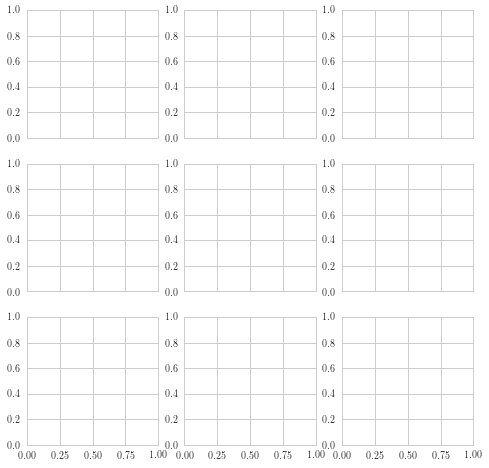

In [7]:
fsize = 16/2, 16/2
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=fsize)
